In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_excel('E:\AA Project DS\Data_Train.xlsx')

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
train_data.shape

(10683, 11)

In [6]:
train_data.dropna(inplace=True)

In [7]:
train_data.shape

(10682, 11)

In [8]:
train_data.isna().sum()    

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
def change_into_datetime(col):
    train_data[col] = pd.to_datetime(train_data[col])

In [11]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [13]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [14]:
train_data['Journey_Day'] = train_data['Date_of_Journey'].dt.day
train_data['Journey_month'] = train_data['Date_of_Journey'].dt.month

In [15]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-05-13 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-13 05:50:00,2021-05-13 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-05-13 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-05-13 18:05:00,2021-05-13 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-05-13 16:50:00,2021-05-13 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [16]:
train_data.drop('Date_of_Journey',axis=1,inplace=True)

In [17]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-05-13 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-13 05:50:00,2021-05-13 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-05-13 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-05-13 18:05:00,2021-05-13 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-05-13 16:50:00,2021-05-13 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [18]:
def extract_hour(df,col):
    df[col+'_hour'] = df[col].dt.hour
def extract_min(df,col):
    df[col+'_min'] = df[col].dt.minute
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [19]:
extract_hour(train_data,'Dep_Time')
extract_min(train_data,'Dep_Time')
drop_column(train_data,'Dep_Time')

In [20]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_Time_hour,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-13 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-05-13 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-05-13 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [21]:
extract_hour(train_data,'Arrival_Time')
extract_min(train_data,'Arrival_Time')
drop_column(train_data,'Arrival_Time')

In [22]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [23]:
duration=list(train_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' ')) == 2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]


In [24]:
train_data['Duration'] = duration

In [25]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [26]:
def hour(x):
    return x.split(' ')[0][0:-1]
def minute(x):
    return x.split(' ')[1][0:-1]

In [27]:
train_data['Duration_hours'] = train_data['Duration'].apply(hour)
train_data['Duration_mins'] = train_data['Duration'].apply(minute)

In [28]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [29]:
drop_column(train_data,'Duration')

In [30]:
train_data.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
Journey_Day           int64
Journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
Duration_hours       object
Duration_mins        object
dtype: object

In [31]:
train_data['Duration_hours'] = train_data['Duration_hours'].astype(int)
train_data['Duration_mins'] = train_data['Duration_mins'].astype(int)

In [32]:
train_data.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
Journey_Day           int64
Journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
Duration_hours        int32
Duration_mins         int32
dtype: object

In [33]:
cat_col = [col for col in train_data.columns if train_data[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [34]:
cont_col = [col for col in train_data.columns if train_data[col].dtype!='O']
cont_col

['Price',
 'Journey_Day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'Duration_hours',
 'Duration_mins']

In [35]:
categorical = train_data[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [36]:
categorical['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [37]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

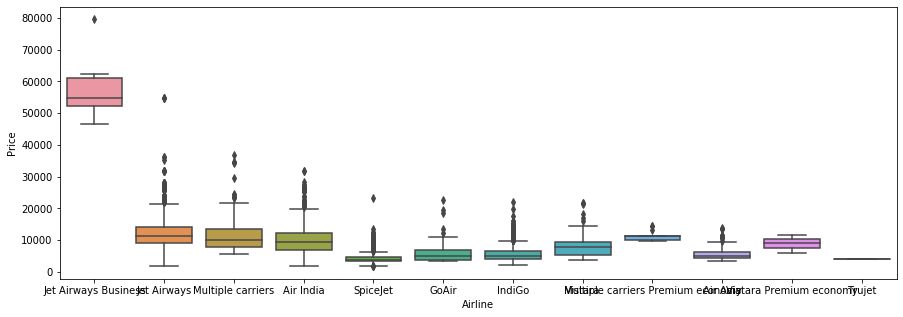

In [38]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False))

In [39]:
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)
Airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [40]:
Source=pd.get_dummies(categorical['Source'],drop_first=True)
Source

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [41]:
Destination=pd.get_dummies(categorical['Destination'],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [42]:
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
categorical['Route_3'] = categorical['Route'].str.split('→').str[2]
categorical['Route_4'] = categorical['Route'].str.split('→').str[3]
categorical['Route_5'] = categorical['Route'].str.split('→').str[4]

C:\Users\sharad\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sharad\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sharad\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [43]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [44]:
drop_column(categorical,'Route')

C:\Users\sharad\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [45]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [46]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [47]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [48]:
for i in ['Route_3', 'Route_4', 'Route_5']:
    categorical[i].fillna('None',inplace=True)

C:\Users\sharad\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [49]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [50]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
encoder = LabelEncoder()

In [53]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [54]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i] = encoder.fit_transform(categorical[i])

C:\Users\sharad\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [56]:
drop_column(categorical,'Additional_Info')

C:\Users\sharad\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [57]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [58]:
dict = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [59]:
categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)

C:\Users\sharad\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [61]:
data_train=pd.concat([categorical,Airline,Source,Destination,train_data[cont_col]],axis=1)

In [62]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,Journey_Day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302,3,1,16,50,21,35,4,45


In [63]:
drop_column(data_train,'Airline')
drop_column(data_train,'Source')
drop_column(data_train,'Destination')

In [64]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Journey_Day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


In [65]:
pd.set_option('display.max_columns',35)
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_Day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [66]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

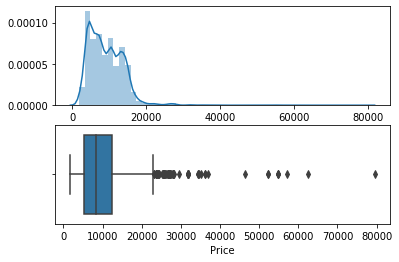

In [67]:
plot(data_train,'Price')

In [68]:
data_train['Price'] = np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

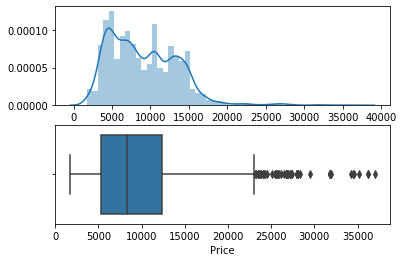

In [69]:
plot(data_train,'Price')

In [70]:
X = data_train.drop('Price',axis=1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_Day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [71]:
X.shape

(10682, 34)

In [72]:
data_train.shape

(10682, 35)

In [73]:
y = data_train['Price']

In [74]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [75]:
from sklearn.feature_selection import mutual_info_classif

In [76]:
mutual_info_classif(X,y)

array([2.11910178e+00, 2.07436428e+00, 2.72574154e+00, 2.23233502e+00,
       1.47899164e+00, 7.53029888e-01, 7.50844144e-01, 1.08666520e-01,
       6.71053769e-01, 9.35821153e-01, 7.35343533e-03, 5.68715100e-01,
       3.25615034e-03, 3.05160730e-01, 2.13404931e-03, 2.27796360e-01,
       0.00000000e+00, 1.76048408e-01, 1.53759574e+00, 8.69551553e-01,
       2.92562200e-01, 1.56582797e+00, 4.13713971e-01, 2.84512581e-01,
       1.72257391e-01, 3.68825597e-01, 1.09239250e+00, 8.73612875e-01,
       1.40742137e+00, 1.21879117e+00, 1.81174823e+00, 1.52314869e+00,
       1.82946092e+00, 1.07862565e+00])

In [77]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.161087
Route_1,2.074676
Route_2,2.840699
Route_3,2.299448
Route_4,1.462091
Route_5,0.743170
Air India,0.736203
GoAir,0.112390
IndiGo,0.664568
Jet Airways,0.923992


In [78]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route_2,2.840699
Route_3,2.299448
Total_Stops,2.161087
Route_1,2.074676
Arrival_Time_hour,1.800304
Duration_hours,1.784673
Arrival_Time_min,1.539866
Delhi,1.536659
Cochin,1.495891
Route_4,1.462091


In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [80]:
from sklearn import metrics
def predict(ml_model):
    model = ml_model.fit(X_train,y_train)
    print('Training Score {}'.format(model.score(X_train,y_train)))
    predictions=model.predict(X_test)
    print('Predictions are {}'.format(predictions))
    print('\n')
    r2_score = metrics.r2_score(y_test,predictions)
    print('r2 score is{}'.format(r2_score))
    print('MAE: ',metrics.mean_absolute_error(y_test,predictions))
    print('MSE: ',metrics.mean_squared_error(y_test,predictions))
    print('RMSE: ',np.sqrt(metrics.mean_absolute_error(y_test,predictions)))
    sns.distplot(y_test-predictions)

In [81]:
from sklearn.ensemble import RandomForestRegressor

Training Score 0.9525906164692581
Predictions are [13965.8175     13844.73333333 13316.647      ... 12362.86333333
  3674.38142857 12868.92366667]


r2 score is0.8286129264729446
MAE:  1135.3169892794645
MSE:  3237541.463489444
RMSE:  33.694465261812134


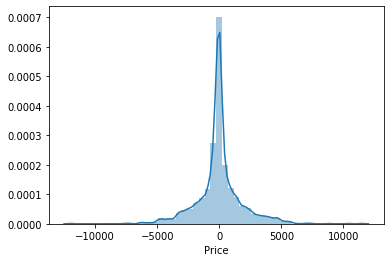

In [82]:
predict(RandomForestRegressor())